<a href="https://colab.research.google.com/github/ds-sinhalen/Data-Analysis-04-Part-I-II-Linear-Correlation-Boxplot/blob/master/Data_Analysis_04_Part_I%26II_Linear_Correlation%2C_Boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("Auto_mobile.csv")

In [0]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,8.703704,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.703704,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.038462,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,7.833333,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,10.681818,13.055556,Low,0,1,1,0


<b><h3>Correlation between different variables</h3></b>
Correlation is a statistical metric for measuring to what extent different variables are interdependent. In other words, when we look at two variables over time, if one variable changes how does this affect change in the other variable? For example, smoking is known to be correlated to lung cancer since you have a higher chance of getting lung cancer if you smoke.In data science we usually deal more with correlation.

In [0]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,-0.029807,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.181189,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.577576,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.707108,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.736728,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.084301,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.836921,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.783465,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.559112,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.047089,0.036133,0.241064,-0.241064,-0.218233,0.218233


The diagonal elements are always one.

In [0]:
y = df[['bore','stroke' ,'compression-ratio','horsepower']]
y.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


<b><h2>Continuous numerical variables:</h2></b>

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.Each observation in the scatter plot is represented as a point. This plot shows the relationship between two variables.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

 Let's see several examples of different linear relationships:

 Import visualization packages "Matplotlib" and "Seaborn"

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

<b><h4>Positive linear relationship</h4></b>

Let's find the scatterplot of "engine-size" and "price" 

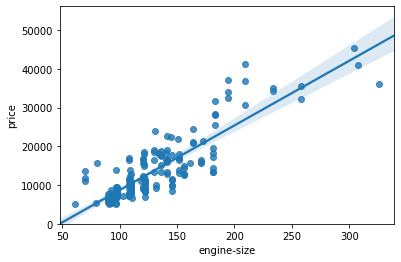

In [0]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [0]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<b><h4>Negative linear relationship</h4></b>

Let's find the scatterplot of "highway-mpg" and "price"

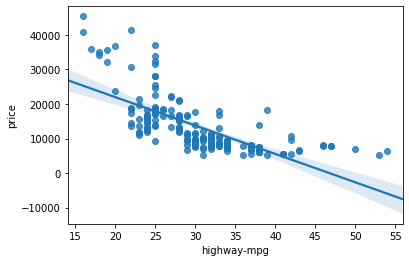

In [0]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()

<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704

In [0]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<b><h4>Weak Linear Relationship</h4></b>

Let's see if "Peak-rpm" as a predictor variable of "price".

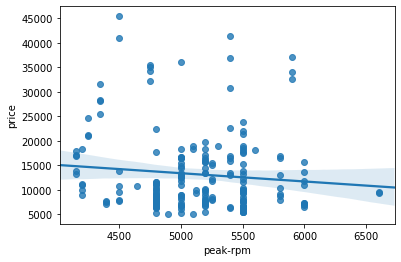

In [0]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616 

In [0]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Let's find the scatterplot of "stroke" and "price"

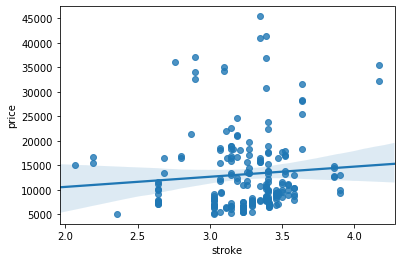

In [0]:
sns.regplot(x='stroke', y='price', data=df)
plt.show()

In [0]:
 df[["stroke","price"]].corr() 

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<b><h3>Categorical variables</h3></b>
<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots since you can visualize the various distributions of the data. The main features of the box plot shows are the median of the data which represents where the middle data point is. The upper quartile shows where the 75th percentile is. The lower quartile shows where the 25th percentile is. The data between the upper and lower quartile represents the interquartile range. Next, you have the lower and upper extremes. These are calculated as 1.5 times the interquartilre range above the 75th percentile and as 1.5 times the IQR below the 25th percentile. Finally, box plots also display outliers as individual dots that occur outside the upper and lower extremes. With box plots, you can easily spot outliers and also see the distribution and skewness of the data. Box plots make it easy to compare between groups.</p>

<img src = 'https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png' width = 500>

Let's look at the relationship between "body-style" and "price".

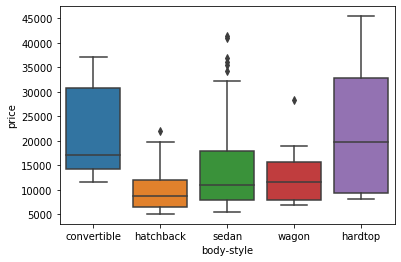

In [0]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>

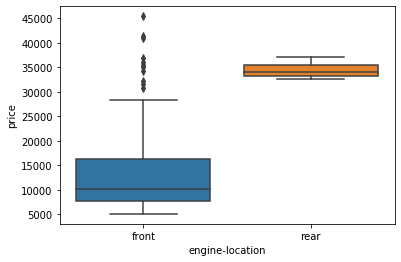

In [0]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

 Let's examine "drive-wheels" and "price".

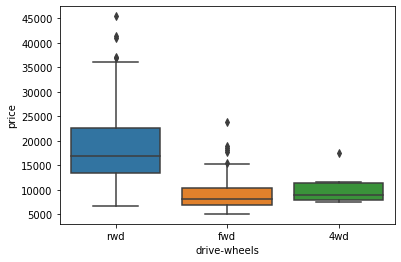

In [0]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>